In [ ]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=c36510fab84c2c115680351c3ee9fccde22670f3d5e0928063358dfd0443d149
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


Recommended TIP intake: 29.25


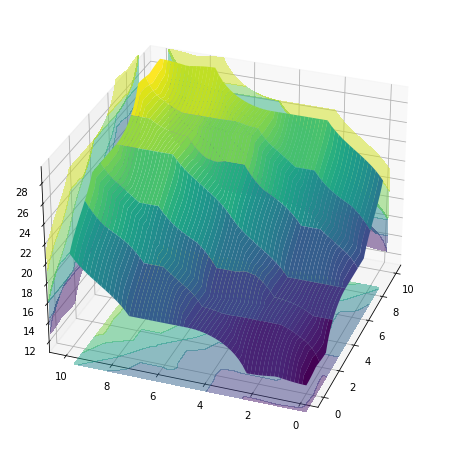

In [ ]:
#EXERCISE 6: Tipping in restaurant with fuzzy logic

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Universal space helps to compute faster without concerning about accuracy
#Only important points are included here.
#Make it have higher resolution.
universe0 = np.linspace(0, 10, 61)
universe1 = np.linspace(10, 31, 61)

#Create 3 fuzzy variables: 2 input and 1 output
food = ctrl.Antecedent(universe0, 'food')
service = ctrl.Antecedent(universe0, 'service')
tip = ctrl.Consequent(universe1, 'tip')

#Setting VP: Verry Poor, P: Poor, AV: Average, G: Good, VG: Very Good
names = ['VP','P','AV','G','VG']
food.automf(names=names)
service.automf(names=names)
tip.automf(names=names)

#Set Rules
rules = [
        ctrl.Rule(antecedent = ((food['VP']& service['VP'])|
                               (food['P']& service['VP'])  |
                               (food['VP']& service['P'])),
                               consequent = tip['VP'], label = 'rule VP'),

        ctrl.Rule(antecedent = ((food['VP']& service['AV'])|
                               (food['VP']& service['G'])  |
                               (food['P']& service['P'])   |
                               (food['P']& service['AV'])  |
                               (food['AV']& service['P'])  |
                               (food['AV']& service['VP']) |
                               (food['G']& service['VP'])),
                               consequent = tip['P'], label = 'rule P'),

        ctrl.Rule(antecedent = ((food['VP']& service['VG'])|
                               (food['P']& service['G'])   |
                               (food['AV']& service['AV']) |
                               (food['G']& service['P'])   |
                               (food['VG']& service['VP'])),
                               consequent = tip['AV'], label = 'rule AV'),

        ctrl.Rule(antecedent = ((food['P']& service['VG'])|
                               (food['AV']& service['VG'])|
                               (food['AV']& service['G']) |
                               (food['G']& service['G'])  |
                               (food['G']& service['AV']) |
                               (food['VG']& service['AV'])|
                               (food['VG']& service['P'])),
                               consequent = tip['G'], label = 'rule G'),

        ctrl.Rule(antecedent = ((food['G']& service['VG'])|
                               (food['VG']& service['VG'])|
                               (food['VG']& service['G'])),
                               consequent = tip['VG'], label = 'rule VG')]


# Create control system and simulate
system = ctrl.ControlSystem(rules)
sim = ctrl.ControlSystemSimulation(system, flush_after_run=61 * 61 + 1)

upsampled = np.linspace(0, 10, 61)
x, y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)

for i in range(61):
    for j in range(61):
        # Assign input values to antecedents
        sim.input['food'] = x[i, j]
        sim.input['service'] = y[i, j]
        # Make sure all antecedents have input values before computing        
        sim.compute()
        z[i, j] = sim.output['tip']

print("Recommended TIP intake:", round(sim.output['tip'], 2))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

sutf = ax.plot_surface(x, y, z, rstride=1, cmap='viridis',
                       linewidth=0.4, antialiased=True)

cset = ax.contourf(x, y, z, zdir='z', offset=9, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='x', offset=11, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='y', offset=11, cmap='viridis', alpha=0.5)

ax.view_init(30, 200)


